<a href="https://colab.research.google.com/github/Shanb007/Movie-Recommender-System-with-Matrix-Factorization/blob/main/ML_Seminar_recommendersys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementing Matrix Factorization with different Approaches.**
Here, We implement.


*   Singular Value Decomposition (SVD).
*   Stochastic Gradient Descent (SGD).
*   Alternating Least Squares (ALS).

We will be comparing Root Mean Square Error (RMSE) to see which Algo performs well.

We will be using MovieLens 100K dataset.




In [ ]:
import numpy as np
import pandas as pd
 
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import io
import matplotlib.pyplot as plt
%matplotlib inline

# **Load Data.**

In [ ]:
from google.colab import files
uploaded = files.upload()
columns = ['userId', 'movieId', 'rating', 'timestamp']
df = pd.read_csv(io.BytesIO(uploaded['u.data']),sep='\t',names= columns)
df.head()

#merged.head()

Saving u.data to u (1).data


,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
final_df = df.drop(['timestamp'],axis=1)
final_df.head()

,userId,movieId,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


Split Data into train and test.

In [ ]:
train_data, test_data = train_test_split(final_df, test_size=0.25)

# **Fromation of Rating Matrix. (User-Item Matrix.)**

In [ ]:
train_table = train_data.pivot_table(index='userId', columns='movieId',values='rating')
train_table.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1631,1632,1633,1634,1636,1638,1639,1641,1642,1643,1644,1645,1646,1647,1648,1650,1651,1652,1654,1657,1658,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,3.0,3.0,5.0,4.0,1.0,5.0,NaN,NaN,5.0,5.0,5.0,NaN,5.0,3.0,4.0,5.0,NaN,1.0,NaN,4.0,3.0,4.0,3.0,2.0,4.0,1.0,NaN,3.0,5.0,4.0,NaN,1.0,2.0,2.0,3.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_df = train_table.fillna(0)
train_matrix = train_df.to_numpy()
train_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [ ]:
test_table = test_data.pivot_table(index='userId', columns='movieId',values='rating')
test_table.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,41,...,1573,1577,1578,1579,1581,1582,1589,1590,1591,1592,1597,1598,1599,1600,1601,1602,1604,1609,1610,1611,1613,1615,1620,1629,1635,1637,1640,1643,1649,1652,1653,1655,1656,1659,1660,1664,1672,1677,1678,1679
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_df = test_table.fillna(0)
test_matrix = test_df.to_numpy()
test_matrix

array([[5., 3., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **Implementing Singular Value Decomposition.**

In [ ]:
def rmse(prediction_matrix, test_mat):
  prediction = prediction_matrix[test_mat.nonzero()].flatten() 
  test_mat = test_mat[test_mat.nonzero()].flatten()
  rms = sqrt(mean_squared_error(prediction, test_mat))
  return rms

In [ ]:
def svd(train_matrix,test_matrix, lat_feature):
  U, sigma, Vt = svds(train_matrix, k = lat_feature)
  s_diag_matrix = np.diag(sigma)
  prediction_matrix = np.dot(np.dot(U, s_diag_matrix), Vt)
  rmse1 = 1.0
  rmse1 = rmse(prediction_matrix, test_matrix)
  
  return rmse1

rmse_svd = []
for i in  range(1,11):
    k = i * 5
    rmse2 = svd(train_matrix,test_matrix, k)
    rmse_svd.append(rmse2)

print("RMSE for Test Data using Single Value Decomposition:")
for i in range(0,len(rmse_svd)):
  print(rmse_svd[i])

RMSE for Test Data using Single Value Decomposition:
3.1172140193142077
3.108867860764353
3.118516231533946
3.1284245436745812
3.1395643873075367
3.152631878699763
3.1651964971522433
3.176884897973642
3.182613685894511
3.188957182147628


**Index Matrix for train and test matrix.**

In [ ]:
train_ind = train_matrix.copy()
train_ind[train_ind > 0] = 1
train_ind[train_ind == 0] = 0

test_ind = test_matrix.copy()
test_ind[test_ind > 0] = 1
test_ind[test_ind == 0] = 0

# **Implementing Stochastic Gradient Descent (SGD).**

In [ ]:
def sgd_rmse(ind, data_matrix, P, Q):
  return np.sqrt(np.sum((ind * (data_matrix - np.dot(P, Q.T)))**2) / len(data_matrix[data_matrix > 0]))

In [ ]:
def sgd(train, test, train_ind, test_ind, factor_k, gamma, lmbda, iteration):

    train_errors = []
    test_errors = []
    m, n = train.shape
    m1,n1 = test.shape
    # initialize Latent user feature matrix and Latent movie feature matrix
    P = 3 * np.random.rand(m,factor_k)  # Latent user feature matrix
    #print('P:')
    #print(P)
    #print(P.shape)
    Q = 3 * np.random.rand(n,factor_k)  # Latent movie feature matrix
    #print(Q.shape)
    P1 =  3 * np.random.rand(m1,factor_k)
    Q1 =  3 * np.random.rand(n1,factor_k)
    # Only consider non-zero matrix
    users, items = train.nonzero()
    users1, items1 = test.nonzero()
    for iter in range(iteration):
        for u, i in zip(users, items):
            e = train[u, i] - np.dot(P[u], Q[i].T)  # prediction error
            #print('e for the itr is = ', e)
            P[u] += gamma * (e * Q[i] - lmbda * P[u])  # Update latent user feature matrix
            Q[i] += gamma * (e * P[u] - lmbda * Q[i])  # Update latent movie feature matrix

        train_rmse = sgd_rmse(train_ind, train, P, Q)  # Calculate root mean squared error from train dataset
        train_errors.append(train_rmse)

    for iter in range(iteration):
        for u, i in zip(users1, items1):
            e = test[u, i] - np.dot(P1[u], Q1[i].T)  # Calculate error for gradient
            #print('e for the itr is = ', e)
            P1[u] += gamma * (e * Q1[i] - lmbda * P1[u])  # Updating
            Q1[i] += gamma * (e * P1[u] - lmbda * Q1[i])  # Updating
        
        
        test_rmse = sgd_rmse(test_ind, test, P1, Q1)
        test_errors.append(test_rmse)

    return train_errors, test_errors

In [ ]:
factor_k = 20 # number of latent features
gamma = 0.01 # Learning rate
lmbda = 0.1 # Regularisation weight
iteration = 60 # number of iteration
# use stochastic gradient descent to optimize the prediction
train_errors_sgd, test_errors_sgd = sgd(train_matrix, test_matrix, train_ind, test_ind, factor_k, gamma, lmbda, iteration)

In [ ]:
print("RMSE for Test Data using SGD: ")
print(test_errors_sgd)

#print(train_errors_sgd)

RMSE for Test Data using SGD: 
[4.982451796465846, 2.7762781857686276, 2.2449568779013482, 1.946937788137017, 1.7267537023047113, 1.546895063281337, 1.3977305173367267, 1.2752440848644548, 1.1754019070251178, 1.093999954977394, 1.027266436581592, 0.972113268639278, 0.9261159984304244, 0.887400831968284, 0.8545237573553146, 0.826368058495449, 0.8020641558276207, 0.7809290589242677, 0.7624213669921794, 0.7461080088294813, 0.7316396072771519, 0.7187320948297857, 0.7071528501651136, 0.6967101250786274, 0.6872448939354421, 0.6786245106334673, 0.6707377315814838, 0.6634907825230865, 0.6568042303181908, 0.6506104801145145, 0.6448517614725346, 0.6394784989198352, 0.6344479863414378, 0.62972330273451, 0.6252724206766607, 0.6210674694541128, 0.6170841229562409, 0.6133010887499643, 0.6096996796389244, 0.6062634528187053, 0.6029779047115983, 0.5998302118938124, 0.5968090103609499, 0.5939042068261017, 0.5911068168952687, 0.5884088258831688, 0.585803068769822, 0.5832831263939097, 0.5808432354629598,

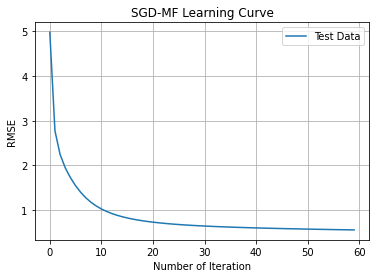

In [ ]:
# Check performance by plotting train and test errors
#plt.plot(range(60), train_errors_sgd, linestyle='-', label='Training Data')
plt.plot(range(60), test_errors_sgd, linestyle='-', label='Test Data')
plt.title('SGD-MF Learning Curve')
plt.xlabel('Number of Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

# **Implementing Alternate Least Squares (ALS).**

In [ ]:
def als_rmse(ind, data_matrix, P, Q):
    return np.sqrt(np.sum((ind * (data_matrix - np.dot(P.T,Q)))**2)/len(data_matrix[data_matrix > 0]))

In [ ]:
def als(train, test, train_ind, test_ind, factor_k, lmbda, iteration):
    
    #train_errors = []
    test_errors = []
    m, n = test.shape 
    # initialize Latent user feature matrix and Latent movie feature matrix
    P = 3 * np.random.rand(factor_k,m)  # Latent user feature matrix
    Q = 3 * np.random.rand(factor_k,n)  # Latent movie feature matrix
    
    Q[:,0] = test[test != 0].mean(axis=0) # Avg. rating for each movie
    E = np.eye(factor_k) # (k x k)-dimensional idendity matrix
    
    for iter in range(iteration):
        #print (iter)
        # fix Latent movie feature matrix(Q), optimize Latent user feature matrix(P)
        for i, Ii in enumerate(test_ind):
            nui = np.count_nonzero(Ii) # Number of item user i has rated
            if (nui == 0): nui = 1 
    
            # Least squares solution
            Ai = np.dot(Q, np.dot(np.diag(Ii), Q.T)) + lmbda * nui * E
            Vi = np.dot(Q, np.dot(np.diag(Ii), test[i].T))
            P[:,i] = np.linalg.solve(Ai,Vi)

        # fix Latent user feature matrix(P), optimize Latent movie feature matrix(Q)
        for j, Ij in enumerate(test_ind.T):
            nmj = np.count_nonzero(Ij) # Number of users that rated item j
            if (nmj == 0): nmj = 1 
        
            # Least squares solution
            Aj = np.dot(P, np.dot(np.diag(Ij), P.T)) + lmbda * nmj * E
            Vj = np.dot(P, np.dot(np.diag(Ij), test[:,j]))
            Q[:,j] = np.linalg.solve(Aj,Vj)

        #train_rmse = als_als_rmse(train_ind, train, P, Q)  
        test_rmse = als_rmse(test_ind, test, P, Q)
        #train_errors.append(train_rmse)
        test_errors.append(test_rmse)

    return test_errors

In [ ]:
factor_k = 20 # number of latent features
gamma = 0.01 # Learning rate
lmbda = 0.1 # Regularisation weight
iteration = 15 # number of iteration

# use the alternating least squares to to optimize the prediction
test_errors_als = als(train_matrix, test_matrix, train_ind, test_ind, factor_k, lmbda, iteration)

In [ ]:
print("RMSE for Test Data using ALS:")
print(test_errors_als)

RMSE for Test Data using ALS:
[1.1681225435308362, 0.7648134780509072, 0.6281331249320726, 0.5588726219896141, 0.5177467492735498, 0.49112760790187626, 0.47286401041917725, 0.4597279872447412, 0.44988641092220183, 0.4422702663359236, 0.4362411361539669, 0.4313941550344527, 0.42745070820874115, 0.42420659965824475, 0.42150793814836174]


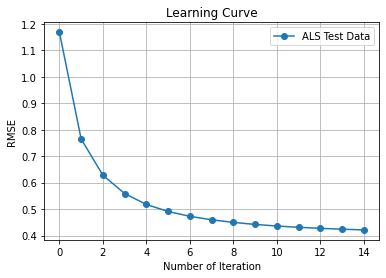

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(iteration), test_errors_als, marker='o', label='ALS Test Data')
#plt.plot(range(60), test_errors_sgd, marker='v', label='SGD Test Data')
plt.title('Learning Curve')
plt.xlabel('Number of Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()